In [1]:
import pandas as pd
import ipywidgets as widgets
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import MG_Formulas as MG
import itertools
import yfinance as yfin
from pandas_datareader import data as pdr
from matplotlib.ticker import MultipleLocator
import numpy as np
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
sns.set()
%load_ext autoreload
%autoreload 2

**RANDOM WALK GENERATION FOR CCPI STRATEGY**

PROJECT DEVELOP BY: Ing. Mateo Gutierrez Acosta


### RANDOM WALK GENERATION (RANDOM RETURNS)

$$ \frac{S_{t+dt}-S_t}{S_t} = \mu dt + \sigma\sqrt{dt}\xi_t $$

When we generate simulated returns, we can usually ignore the decomposition of $\mu$ since we only care about the net effective drift term without worrying about what the components of it are.

The implementation is really very close to the equation above, although it can be optimized in many ways, this is the most direct translation of the equation:


#### Geometric Brownian motion

In [2]:
# mu = return, sigma= risk, s_0= initial value of stock
def gbm(n_years=10, n_scenarios=1000, mu=0.07, sigma=0.15, steps_per_year=12, s_0=100.0):
    """
    Evolution of a stock price using Geometric Brownian Motion Model
    """
    dt = 1/steps_per_year
    n_steps = int(n_years*steps_per_year)
    xi = np.random.normal(size=(n_steps, n_scenarios))
    rets = (mu*dt) + (sigma*np.sqrt(dt)*xi)  # formula
    rets = pd.DataFrame(rets)
    # To Prices
    prices = s_0*(1+rets).cumprod()
    return prices

In [3]:
prices = gbm(n_years=10, n_scenarios=1000)
prices.head()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,93.542749,98.390823,109.427368,100.187444,94.931511,102.257910,98.692229,97.500339,97.244247,108.713946,...,97.320819,103.391305,101.659154,102.212973,99.282294,93.085929,101.396228,108.732912,93.325742,109.575994
1,98.059880,105.421123,115.036183,96.943151,92.311361,95.933872,101.209442,99.594353,98.262918,112.552052,...,96.111876,101.098555,105.209258,105.672337,98.874582,93.977590,101.775429,123.668226,96.199555,106.879805
2,98.638348,96.241175,113.709100,95.637649,90.659124,99.726577,95.555533,104.540434,98.349829,107.803269,...,95.400091,98.373132,98.755189,102.678410,103.059081,93.416762,101.535211,125.873197,87.949356,110.148664
3,101.373165,89.103270,114.976306,90.746277,95.528988,100.351455,92.808364,109.876751,93.107886,107.796847,...,92.914628,96.882638,102.020490,106.702894,110.352847,98.615692,108.113584,120.437839,87.719247,111.142966
4,97.146641,87.566986,116.822714,88.082424,90.905179,96.848760,101.892591,116.358650,95.118590,114.033759,...,88.829918,103.229511,98.641612,110.498393,117.293457,95.963461,113.864662,115.849898,89.497671,116.334197


<Axes: >

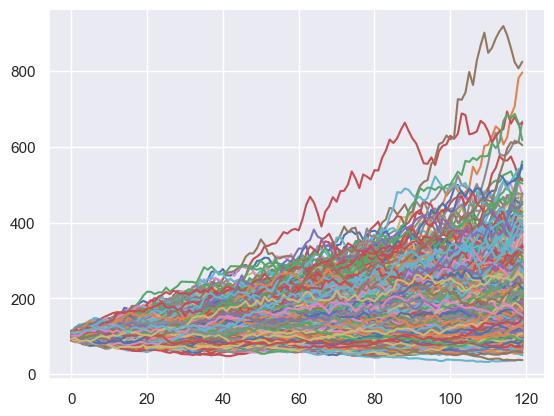

In [4]:
prices.plot(legend=False)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.008909,0.028292,-0.005043,-0.067492,0.050411,-0.016431,-0.027367,-0.010378,-0.094076,-0.004406,0.036590,0.011837,0.002673,0.006529,-0.044742,0.005922,0.002406,-0.030924,0.043924,0.044007
1,0.054417,0.029689,-0.018634,-0.016667,-0.034641,-0.034305,0.013756,-0.021676,-0.033353,-0.083690,0.022797,0.037620,-0.005859,0.043164,0.044379,-0.006106,-0.035164,0.040910,-0.014770,0.019603
2,-0.041277,0.042850,0.015814,0.053203,0.052398,-0.007314,-0.012438,-0.030280,-0.084336,0.016241,-0.036226,0.054973,-0.054984,-0.058592,-0.032683,0.013931,0.057660,-0.037626,0.072692,0.003402
3,-0.011968,-0.063629,-0.040869,0.070365,-0.057402,0.047539,-0.047306,-0.054566,0.028038,-0.041486,0.019211,0.008155,-0.016981,-0.021712,0.025003,0.001718,0.036274,-0.017320,-0.021712,0.041032
4,0.090726,-0.030630,0.019343,-0.067358,-0.082800,-0.041335,0.022444,-0.018536,-0.024531,-0.045521,-0.016560,-0.014704,0.036968,0.029770,-0.055547,-0.004415,0.019152,-0.132283,-0.019842,-0.002451


<Axes: >

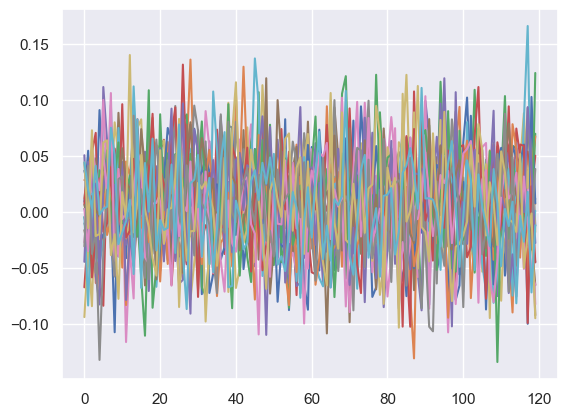

In [6]:
prices2 = MG.gbm(n_years=10, n_scenarios=20)
prices2.head()
prices2.plot(legend=False)

### GBM and CPPI INTERACTIVE PLOTS

#### GMB

1.Formula

In [7]:
def show_gbm(n_scenarios, mu, sigma):
    """
    Draw the results of a stock price evolution under a Geometric Brownian Motion model
    """
    s_0 = 100
    prices = MG.gbm(n_scenarios=n_scenarios, mu=mu, sigma=sigma, s_0=s_0)
    ax = prices.plot(legend=False, color="indianred",
                     alpha=0.5, linewidth=2, figsize=(20, 5))
    ax.axhline(y=s_0, ls=":", color="black")
    # draw a dot at the origin
    ax.plot(0, s_0, marker='o', color='darkred', alpha=0.2)

2) Controls

In [8]:
gbm_controls = widgets.interactive(show_gbm,
                                   n_scenarios=(1, 100, 1),  # min,max,step
                                   mu=(0., .2, .01),
                                   sigma=(0, .3, .01)
                                   )

3) Display

In [9]:
display(gbm_controls)

interactive(children=(IntSlider(value=50, description='n_scenarios', min=1), FloatSlider(value=0.1, descriptio…

## CPPI (Constant Proportion Portfolio Insurance)

CCPI is a financial strategy designed to protect investors from significant losses while still allowing for potential upside gains. It works by dynamically adjusting the allocation between a risky asset (like stocks) and a safe asset (like bonds) based on the value of the portfolio

#### INTERACTIVE CPPI

In [10]:
def show_cppi(n_scenarios=50, mu=0.07, sigma=0.15, m=3, floor=0.8, riskfree=0.03, y_max=100):
    """
    Plot the results of a Monte Carlo Simulation of CPPI
    """
    balance = 100
    sim_rets = MG.gbm(n_scenarios=n_scenarios, mu=mu, sigma=sigma,
                      steps_per_year=12, s_0=balance, prices=False)
    risky_r = pd.DataFrame(sim_rets)
    # run the "back"-test
    btr = MG.run_cppi(risky_r=risky_r,
                      safe_r=riskfree, drawdown=None, m=m, balance=balance, floor=floor)
    wealth = btr["Wealth"]
    y_max = wealth.values.max()*y_max/100
    ax = wealth.plot(legend=False, alpha=0.3,
                     color="indianred", figsize=(20, 6))
    ax.axhline(y=balance, ls=":", color="black")
    ax.axhline(y=balance*floor, ls="--", color="red")
    ax.set_ylim(top=y_max)

In [11]:
cppi_controls = widgets.interactive(show_cppi,
                                    n_scenarios=widgets.IntSlider(
                                        min=1, max=1000, step=5, value=50),
                                    mu=(0., +.2, .01),
                                    sigma=(0, .30, .05),
                                    floor=(0, 2, .1),
                                    m=(1, 5, .5),
                                    riskfree=(0, .05, .01),
                                    y_max=widgets.IntSlider(min=0, max=100, step=1, value=100,
                                                            description="Zoom Y Axis")
                                    )
display(cppi_controls)

interactive(children=(IntSlider(value=50, description='n_scenarios', max=1000, min=1, step=5), FloatSlider(val…

In [12]:
def show_cppi(n_scenarios=50, mu=0.07, sigma=0.15, m=3, floor=0., riskfree=0.03, steps_per_year=12, y_max=100):
    """
    Plot the results of a Monte Carlo Simulation of CPPI
    """
    start = 100
    sim_rets = MG.gbm(n_scenarios=n_scenarios, mu=mu, sigma=sigma,
                      prices=False, steps_per_year=steps_per_year)
    risky_r = pd.DataFrame(sim_rets)
    # run the "back"-test
    btr = MG.run_cppi(risky_r=pd.DataFrame(
        risky_r), safe_r=riskfree, m=m, balance=start, floor=floor, drawdown=None)
    wealth = btr["Wealth"]

    # calculate terminal wealth stats
    y_max = wealth.values.max()*y_max/100
    terminal_wealth = wealth.iloc[-1]

    tw_mean = terminal_wealth.mean()
    tw_median = terminal_wealth.median()
    failure_mask = np.less(terminal_wealth, start*floor)
    n_failures = failure_mask.sum()
    p_fail = n_failures/n_scenarios

    e_shortfall = np.dot(terminal_wealth-start*floor,
                         failure_mask)/n_failures if n_failures > 0 else 0.0

    # Plot!
    fig, (wealth_ax, hist_ax) = plt.subplots(nrows=1, ncols=2,
                                             sharey=True, gridspec_kw={'width_ratios': [3, 2]}, figsize=(24, 9))
    plt.subplots_adjust(wspace=0.0)

    wealth.plot(ax=wealth_ax, legend=False, alpha=0.3, color="indianred")
    wealth_ax.axhline(y=start, ls=":", color="black")
    wealth_ax.axhline(y=start*floor, ls="--", color="red")
    wealth_ax.set_ylim(top=y_max)

    terminal_wealth.plot.hist(
        ax=hist_ax, bins=50, ec='w', fc='indianred', orientation='horizontal')
    hist_ax.axhline(y=start, ls=":", color="black")
    hist_ax.axhline(y=tw_mean, ls=":", color="blue")
    hist_ax.axhline(y=tw_median, ls=":", color="purple")
    hist_ax.annotate(f"Start: ${int(start)}", xy=(.7, .95),
                     xycoords='axes fraction', fontsize=24)
    hist_ax.annotate(f"Mean: ${int(tw_mean)}", xy=(.7, .9),
                     xycoords='axes fraction', fontsize=24)
    hist_ax.annotate(f"Median: ${int(tw_median)}",
                     xy=(.7, .85), xycoords='axes fraction', fontsize=24)
    if (floor > 0.01):
        hist_ax.axhline(y=start*floor, ls="--", color="red", linewidth=3)
        hist_ax.annotate(f"Violations: ${n_failures} ({p_fail*100:2.2f}%)\nE(shortfall)=${
                         e_shortfall:2.2f}", xy=(.7, .7), xycoords='axes fraction', fontsize=24)

**Instructions**
To use the simulation please select the following:

n_scenarios: Number of simulations

mu: Expected return of the asset or portfolio

sigma: Expected risk (Standard deviation)

m: Cushion

floor: Max % of drawdown allowed

riskfree: Annual return of risk free asset

rebals/year: The amount of revaluations and reallocations in a year



In [13]:
cppi_controls = widgets.interactive(show_cppi,
                                    n_scenarios=widgets.IntSlider(
                                        min=1, max=1000, step=5, value=50),
                                    mu=(0., +.2, .01),
                                    sigma=(0, .5, .05),
                                    floor=(0, 2, .1),
                                    m=(1, 5, .5),
                                    riskfree=(0, .05, .01),
                                    steps_per_year=widgets.IntSlider(min=1, max=12, step=1, value=12,
                                                                     description="Rebals/Year"),
                                    y_max=widgets.IntSlider(min=0, max=100, step=1, value=100,
                                                            description="Zoom Y Axis")
                                    )
display(cppi_controls)

interactive(children=(IntSlider(value=50, description='n_scenarios', max=1000, min=1, step=5), FloatSlider(val…